In [1]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff("../hypothyroid_modified_cjlin.arff")
data = pd.DataFrame(data[0])
data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,Class
0,41.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',1.30,2.5,125.0,1.14,109.0,b'SVHC',b'negative'
1,23.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',4.10,2.0,102.0,1.00,106.0,b'other',b'negative'
2,46.0,b'M',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',0.98,1.7,109.0,0.91,120.0,b'other',b'negative'
3,70.0,b'F',b't',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',0.16,1.9,175.0,1.00,106.0,b'other',b'negative'
4,70.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',0.72,1.2,61.0,0.87,70.0,b'SVI',b'negative'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,19.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',8.80,2.7,108.0,1.11,97.0,b'other',b'compensated_hypothyroid'
3394,68.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',1.00,2.1,124.0,1.08,114.0,b'SVI',b'negative'
3395,74.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',5.10,1.8,112.0,1.07,105.0,b'other',b'negative'
3396,72.0,b'M',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',0.70,2.0,82.0,0.94,87.0,b'SVI',b'negative'


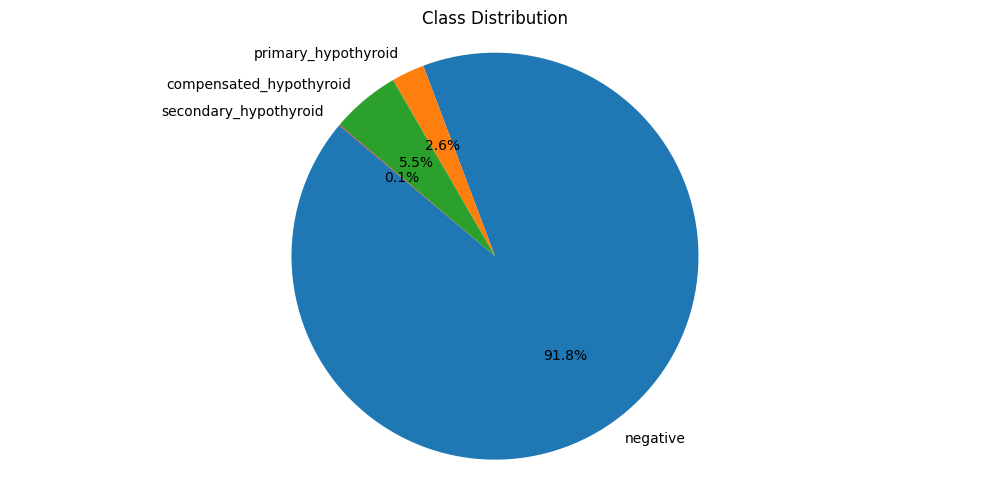

In [2]:
import matplotlib.pyplot as plt
ansType = {cls: 0 for cls in set(data["Class"])}
total = 0
for cls in data["Class"]:
    ansType[cls] += 1
    total += 1
    
# 將字串百分比轉成數值以便畫圖
labels = [key.decode() if isinstance(key, bytes) else str(key) for key in ansType.keys()]
values = [float(val) for val in ansType.values()]

# 畫出圓餅圖
plt.figure(figsize=(10, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Class Distribution")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
data = pd.get_dummies(data)

x = data.iloc[:,0:-4]
y = data.iloc[:,-4:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

# 將 one-hot 轉回類別標籤以便 sklearn 相容
y_train_cls = np.argmax(y_train, axis=1)
y_test_cls = np.argmax(y_test, axis=1)

data

,age,TSH,T3,TT4,T4U,FTI,sex_b'F',sex_b'M',on thyroxine_b'f',on thyroxine_b't',...,psych_b't',referral source_b'STMW',referral source_b'SVHC',referral source_b'SVHD',referral source_b'SVI',referral source_b'other',Class_b'compensated_hypothyroid',Class_b'negative',Class_b'primary_hypothyroid',Class_b'secondary_hypothyroid'
0,41.0,1.30,2.5,125.0,1.14,109.0,True,False,True,False,...,False,False,True,False,False,False,False,True,False,False
1,23.0,4.10,2.0,102.0,1.00,106.0,True,False,True,False,...,False,False,False,False,False,True,False,True,False,False
2,46.0,0.98,1.7,109.0,0.91,120.0,False,True,True,False,...,False,False,False,False,False,True,False,True,False,False
3,70.0,0.16,1.9,175.0,1.00,106.0,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
4,70.0,0.72,1.2,61.0,0.87,70.0,True,False,True,False,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,19.0,8.80,2.7,108.0,1.11,97.0,True,False,True,False,...,False,False,False,False,False,True,True,False,False,False
3394,68.0,1.00,2.1,124.0,1.08,114.0,True,False,True,False,...,False,False,False,False,True,False,False,True,False,False
3395,74.0,5.10,1.8,112.0,1.07,105.0,True,False,True,False,...,False,False,False,False,False,True,False,True,False,False
3396,72.0,0.70,2.0,82.0,0.94,87.0,False,True,True,False,...,False,False,False,False,True,False,False,True,False,False


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_bar_metrics(acc_list, f1_list, loss_list, model_name="Model"):
    runs = np.arange(1, len(acc_list) + 1)

    # 畫圖
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.bar(runs, acc_list, color='skyblue')
    plt.title(f"{model_name} - Accuracy per Run")
    plt.xlabel("Run")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)

    plt.subplot(1, 3, 2)
    plt.bar(runs, loss_list, color='salmon')
    plt.title(f"{model_name} - Log Loss per Run")
    plt.xlabel("Run")
    plt.ylabel("Loss")

    plt.subplot(1, 3, 3)
    plt.bar(runs, f1_list, color='lightgreen')
    plt.title(f"{model_name} - F1 Score per Run")
    plt.xlabel("Run")
    plt.ylabel("F1 Macro")
    plt.ylim(0, 1)

    plt.tight_layout()
    plt.show()

    # 整理成表格
    df = pd.DataFrame({
        "Run": runs,
        "Accuracy": np.round(acc_list, 4),
        "Log Loss": np.round(loss_list, 4),
        "F1 Macro": np.round(f1_list, 4)
    })

    print(f"\n {model_name} - Detailed Results:")
    print(df.to_string(index=False))

    # 清除避免污染
    acc_list.clear()
    f1_list.clear()
    loss_list.clear()


In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, log_loss
import numpy as np
import pandas as pd

acc_list = []
f1_list = []
loss_list = []
results_grid = []

param_grid_mlp = {
    'clf__hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'clf__activation': ['relu', 'tanh'],
    'clf__solver': ['adam'],
    'clf__alpha': [0.0001, 0.001],
    'clf__learning_rate': ['constant', 'adaptive']
}

for run in range(10):
    pipe = Pipeline([
        ('clf', MLPClassifier(max_iter=1000, random_state=run))
    ])

    grid = GridSearchCV(pipe, param_grid_mlp, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(x_train, y_train_cls)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test)
    y_prob = best_model.predict_proba(x_test)

    acc = accuracy_score(y_test_cls, y_pred)
    f1 = f1_score(y_test_cls, y_pred, average='macro')
    loss = log_loss(y_test_cls, y_prob, labels=np.unique(np.concatenate([y_train_cls, y_test_cls])))

    acc_list.append(acc)
    f1_list.append(f1)
    loss_list.append(loss)

    for i in range(len(grid.cv_results_['params'])):
        params = grid.cv_results_['params'][i]
        results_grid.append({
            'hidden_layer_sizes': params['clf__hidden_layer_sizes'],
            'activation': params['clf__activation'],
            'solver': params['clf__solver'],
            'alpha': params['clf__alpha'],
            'learning_rate': params['clf__learning_rate'],
            'acc': grid.cv_results_['mean_test_score'][i],
            'loss': loss,
            'f1': f1
        })

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

In [6]:
df_results = pd.DataFrame(results_grid)
print("\n 所有參數組合結果：")
print(df_results.sort_values(by='acc', ascending=False).reset_index(drop=True))


 所有參數組合結果：
    hidden_layer_sizes activation solver   alpha learning_rate       acc  \
0                (50,)       tanh   adam  0.0010      adaptive  0.988964   
1                (50,)       tanh   adam  0.0010      constant  0.988964   
2               (100,)       tanh   adam  0.0010      constant  0.986759   
3               (100,)       tanh   adam  0.0010      adaptive  0.986759   
4               (100,)       tanh   adam  0.0001      constant  0.986021   
..                 ...        ...    ...     ...           ...       ...   
235             (100,)       relu   adam  0.0001      adaptive  0.972410   
236          (100, 50)       relu   adam  0.0010      constant  0.970939   
237          (100, 50)       relu   adam  0.0010      adaptive  0.970939   
238          (100, 50)       relu   adam  0.0010      constant  0.970196   
239          (100, 50)       relu   adam  0.0010      adaptive  0.970196   

         loss        f1  
0    0.032162  0.673970  
1    0.032162  0.673970

In [7]:
best_acc_row = df_results.loc[df_results['acc'].idxmax()]
best_loss_row = df_results.loc[df_results['loss'].idxmin()]
best_f1_row = df_results.loc[df_results['f1'].idxmax()]

print("\n 最佳 Accuracy 組合：")
print(best_acc_row.to_frame().T)

print("\n 最低 Loss 組合：")
print(best_loss_row.to_frame().T)

print("\n 最高 F1 Score 組合：")
print(best_f1_row.to_frame().T)


 最佳 Accuracy 組合：
   hidden_layer_sizes activation solver  alpha learning_rate       acc  \
66              (50,)       tanh   adam  0.001      constant  0.988964   

        loss       f1  
66  0.032162  0.67397  

 最低 Loss 組合：
   hidden_layer_sizes activation solver   alpha learning_rate       acc  \
72              (50,)       relu   adam  0.0001      constant  0.980869   

        loss        f1  
72  0.025702  0.944514  

 最高 F1 Score 組合：
   hidden_layer_sizes activation solver   alpha learning_rate       acc  \
72              (50,)       relu   adam  0.0001      constant  0.980869   

        loss        f1  
72  0.025702  0.944514  


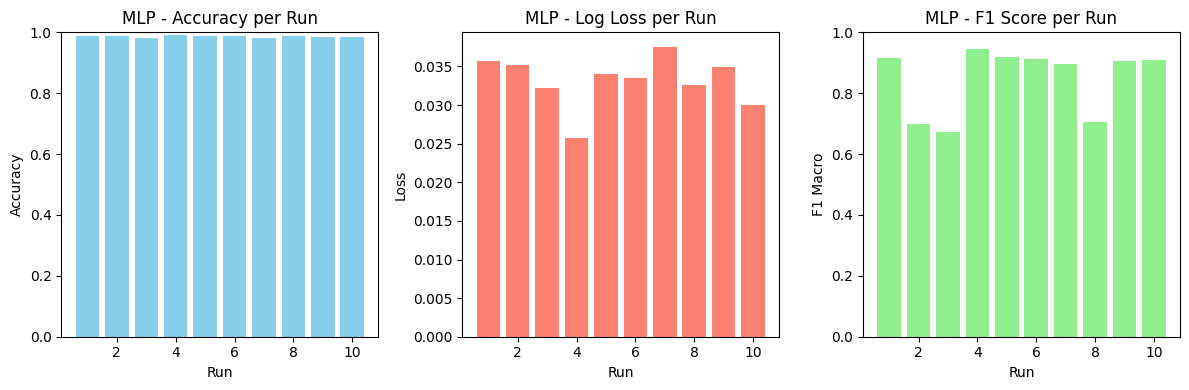


 MLP - Detailed Results:
 Run  Accuracy  Log Loss  F1 Macro
   1    0.9868    0.0357    0.9152
   2    0.9868    0.0352    0.6988
   3    0.9824    0.0322    0.6740
   4    0.9897    0.0257    0.9445
   5    0.9882    0.0340    0.9205
   6    0.9868    0.0335    0.9135
   7    0.9824    0.0375    0.8960
   8    0.9882    0.0326    0.7061
   9    0.9853    0.0349    0.9063
  10    0.9853    0.0300    0.9082


In [8]:
plot_bar_metrics(acc_list, f1_list, loss_list, model_name="MLP")